In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [2]:
import functions as f
import pandas as pd

url_1 = '../data/raw/SYB67_176_202411_Tourist-Visitors Arrival and Expenditure.csv'
df_1 = pd.read_csv(url_1)

url_2 = '../data/raw/SYB67_285_202411_Research and Development Expenditure and Staff.csv'
df_2 = pd.read_csv(url_2)

url_3 = '../data/raw/SYB67_328_202411_Intentional homicides and other crimes.csv'
df_3 = pd.read_csv(url_3)

url_4 = '../data/raw/SYB67_329_202411_Labour Force and Unemployment.csv'
df_4 = pd.read_csv(url_4)

#Function to clean rows and columns
df_1 = f.clean_row_column(df_1,url_1)
df_2 = f.clean_row_column(df_2,url_2)
df_3 = f.clean_row_column(df_3,url_3)
df_4 = f.clean_row_column(df_4,url_4)


#Function to insert column type
df_1 = f.insert_column(df_1,"Type","Tourism")
df_2 = f.insert_column(df_2,"Type","R&D")
df_3 = f.insert_column(df_3,"Type","Crime")
df_4 = f.insert_column(df_4,"Type","Labour & Unemployment")

#Concat all the dataframes.
df = pd.concat([df_1,df_2,df_3,df_4], axis=0)

#Format column names
df.rename(columns={ col: col.rstrip().replace(" ", "_").lower() for col in df.columns}, inplace=True)

#Drop irrelevant columns
df = df.drop(columns=['source','tourism_arrivals_series_type_footnote'])

# #Replace N/A values for tourism_arrivals_series_type column
df.loc[df['type'] == 'Tourism', 'tourism_arrivals_series_type'] = df.loc[df['type'] == 'Tourism', 'tourism_arrivals_series_type'].fillna("TE")

#Convert the data type of value column to float as well check if value is string and then remove the commas also
df['value'] = df['value'].astype(str).str.replace(',', '').astype(float)

# Apply the function to create a new column 'Continent'
df['continent'] = df['region/country/area'].apply(f.get_continent)


# Display the DataFrame with the new column
df



,region/country/area,year,series,type,tourism_arrivals_series_type,value,footnotes,continent
0,Afghanistan,2010,Tourism expenditure (millions of US dollars),Tourism,TE,147.0,NaN,Asia
1,Afghanistan,2020,Tourism expenditure (millions of US dollars),Tourism,TE,75.0,NaN,Asia
2,Albania,2010,Tourist/visitor arrivals (thousands),Tourism,TF,2191.0,Excluding nationals residing abroad.,Europe
3,Albania,2020,Tourist/visitor arrivals (thousands),Tourism,TF,2604.0,Excluding nationals residing abroad.,Europe
4,Albania,2021,Tourist/visitor arrivals (thousands),Tourism,TF,5515.0,Excluding nationals residing abroad.,Europe
...,...,...,...,...,...,...,...,...
5481,European Union (EU),2024,Unemployment rate - Total,Labour & Unemployment,NaN,6.0,Estimate.,Other
5482,European Union (EU),2024,Labour force participation - Male,Labour & Unemployment,NaN,63.9,Estimate.,Other
5483,European Union (EU),2024,Unemployment rate - Male,Labour & Unemployment,NaN,5.7,Estimate.,Other
5484,European Union (EU),2024,Labour force participation - Female,Labour & Unemployment,NaN,51.8,Estimate.,Other


In [3]:
# Size of data for type as Tourism
df_tourism=df[df["type"] == "Tourism"]

In [4]:
# Size of data for type as Tourism and tourism_arrivals_series_type as TE
df_tourism_Exp = df[(df["type"] == "Tourism") & (df["tourism_arrivals_series_type"] == 'TE')]

###  Series International Tourist Arrivals
TF: International tourist arrivals at frontiers (excluding same-day visitors);
VF: International visitor arrivals at frontiers (tourists and same-day visitors);
THS: International tourist arrivals at hotels and similar establishments;
TCE: International tourist arrivals at collective tourism establishments;
NHS: Nights of international tourists in hotels and similar establishments;
NCE: Nights of international tourists in collective tourism establishments.

In [5]:
# group the data using tourism_arrivals_series_type to see different categories
df_tour=df_tourism.groupby("tourism_arrivals_series_type")["value"].sum()
display(df_tour)
#tf_value = df_tour.loc[df_tour['tourism_arrivals_series_type'] == 'TF', 'value'].sum()
print(f"The value for Tourism Expenditure in all continents is {df_tour['TE']:,.2f}(USD Million)" )
print(f"The value for Tourists/Visitors Arrival in all continents is {df_tour['TF']:,.2f}(thousands)" )


tourism_arrivals_series_type
TCE     577866.0
TE     4644076.0
TF     2883608.0
THS       6684.0
VF      503934.0
Name: value, dtype: float64

The value for Tourism Expenditure in all continents is 4,644,076.00(USD Million)
The value for Tourists/Visitors Arrival in all continents is 2,883,608.00(thousands)


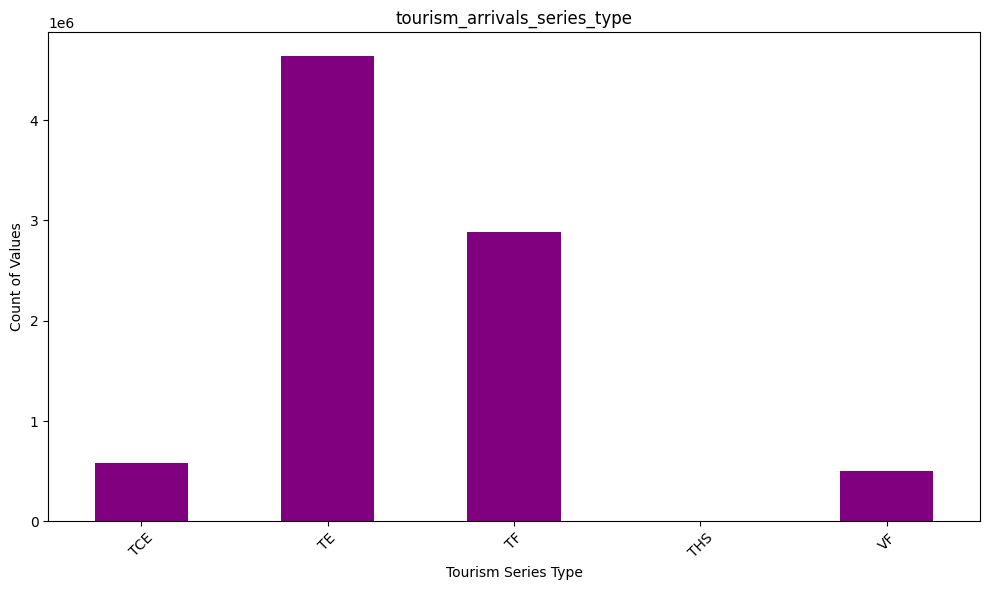

In [6]:
# Plotting a bar chart
df_tour.plot(kind='bar', color='purple', figsize=(10, 6))

# Adding labels and title
plt.title('tourism_arrivals_series_type')
plt.xlabel('Tourism Series Type')
plt.ylabel('Count of Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlapping labels
plt.show()

In [7]:
# group data by continent and by tourist series
df_grouped = df_tourism.groupby(['continent', 'tourism_arrivals_series_type'])['value'].sum().reset_index()
df_grouped_sorted = df_grouped.sort_values(by='value', ascending=False)

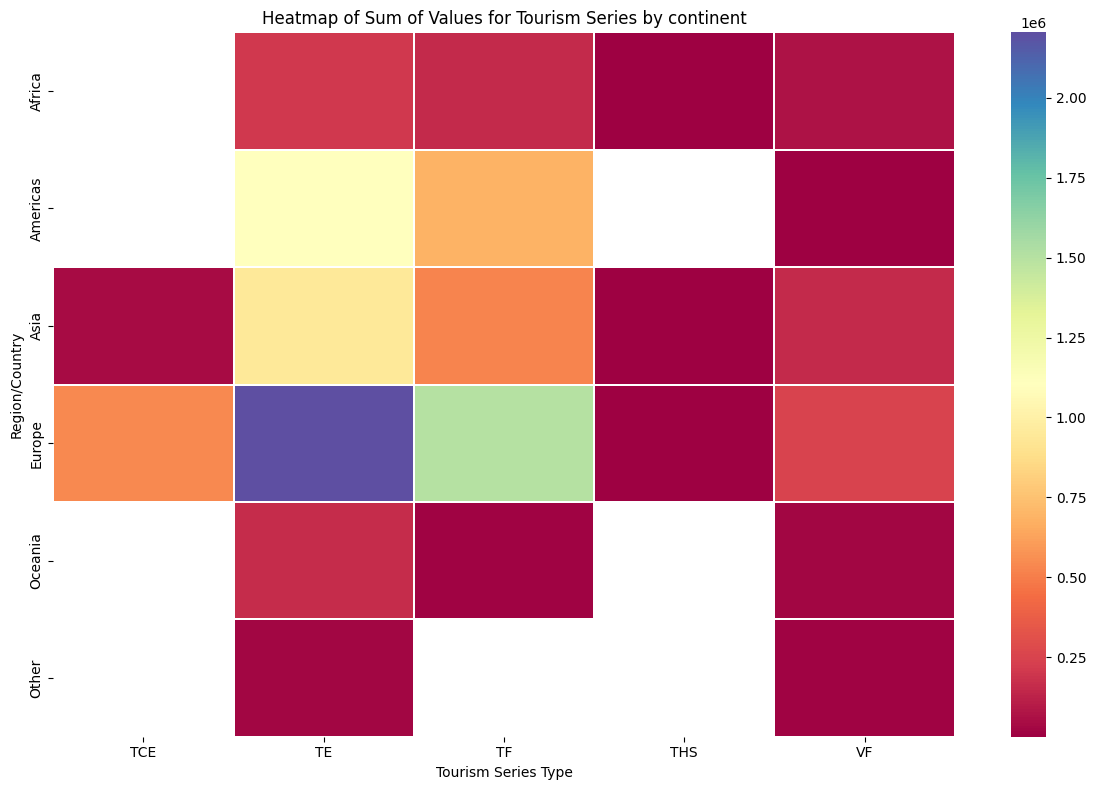

In [8]:
# Pivot the table to create a matrix for the heatmap
df_pivot = df_grouped.pivot(index='continent', columns='tourism_arrivals_series_type', values='value')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=False, fmt=".1f", cmap='Spectral', linewidths=0.3)

# Add title and labels
plt.title('Heatmap of Sum of Values for Tourism Series by continent')
plt.xlabel('Tourism Series Type')
plt.ylabel('Region/Country')

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
# Size of data for type as Tourism and tourism_arrivals_series_type as TE
df_tourism_europe = df_tourism[(df_tourism["continent"] == "Europe")]

In [10]:
df_time_series = df_tourism_europe.groupby(["year", "tourism_arrivals_series_type"])["value"].sum().reset_index()

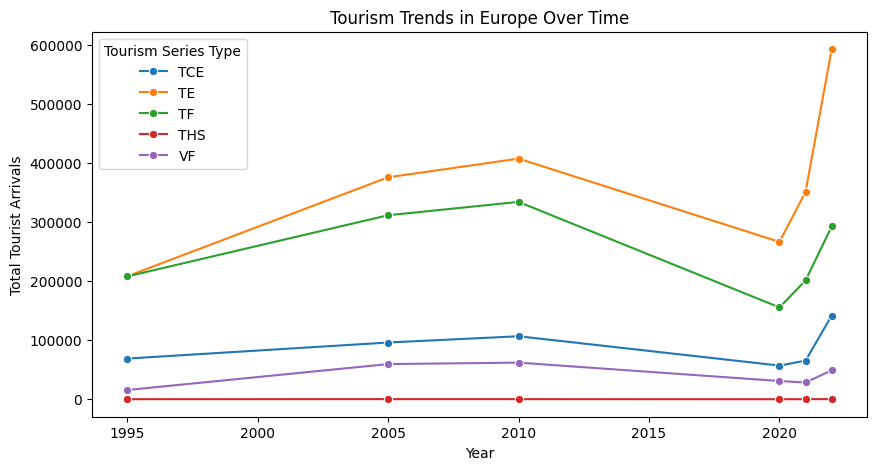

In [11]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_time_series, x="year", y="value", hue="tourism_arrivals_series_type", marker="o")

plt.xlabel("Year")
plt.ylabel("Total Tourist Arrivals")
plt.title("Tourism Trends in Europe Over Time")
plt.legend(title="Tourism Series Type")
plt.show()

In [12]:
df_tourism_europe_country=df_tourism_europe.groupby(['region/country/area', 'tourism_arrivals_series_type'])['value'].sum().reset_index()
df_tourism_europe_country_TF = df_tourism_europe_country[df_tourism_europe_country["tourism_arrivals_series_type"] == "TF"]
df_grouped_sorted = df_tourism_europe_country_TF.sort_values(by='value', ascending=False)

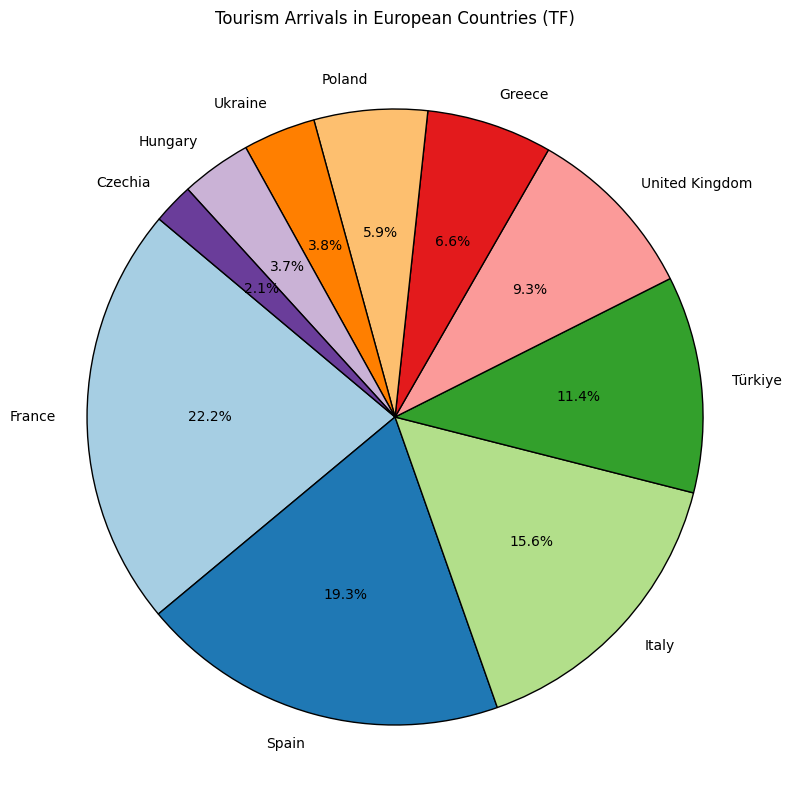

In [13]:
df_pie = df_grouped_sorted.head(10)
# Set figure size
plt.figure(figsize=(10, 10))

# Create pie chart
plt.pie(df_pie["value"], labels=df_pie["region/country/area"], autopct='%1.1f%%', startangle=140, 
        colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})

# Set title
plt.title("Tourism Arrivals in European Countries (TF)")

# Show the pie chart
plt.show()

### R&D Section

#### Gross domestic expenditure on R&D: as a percentage of GDP

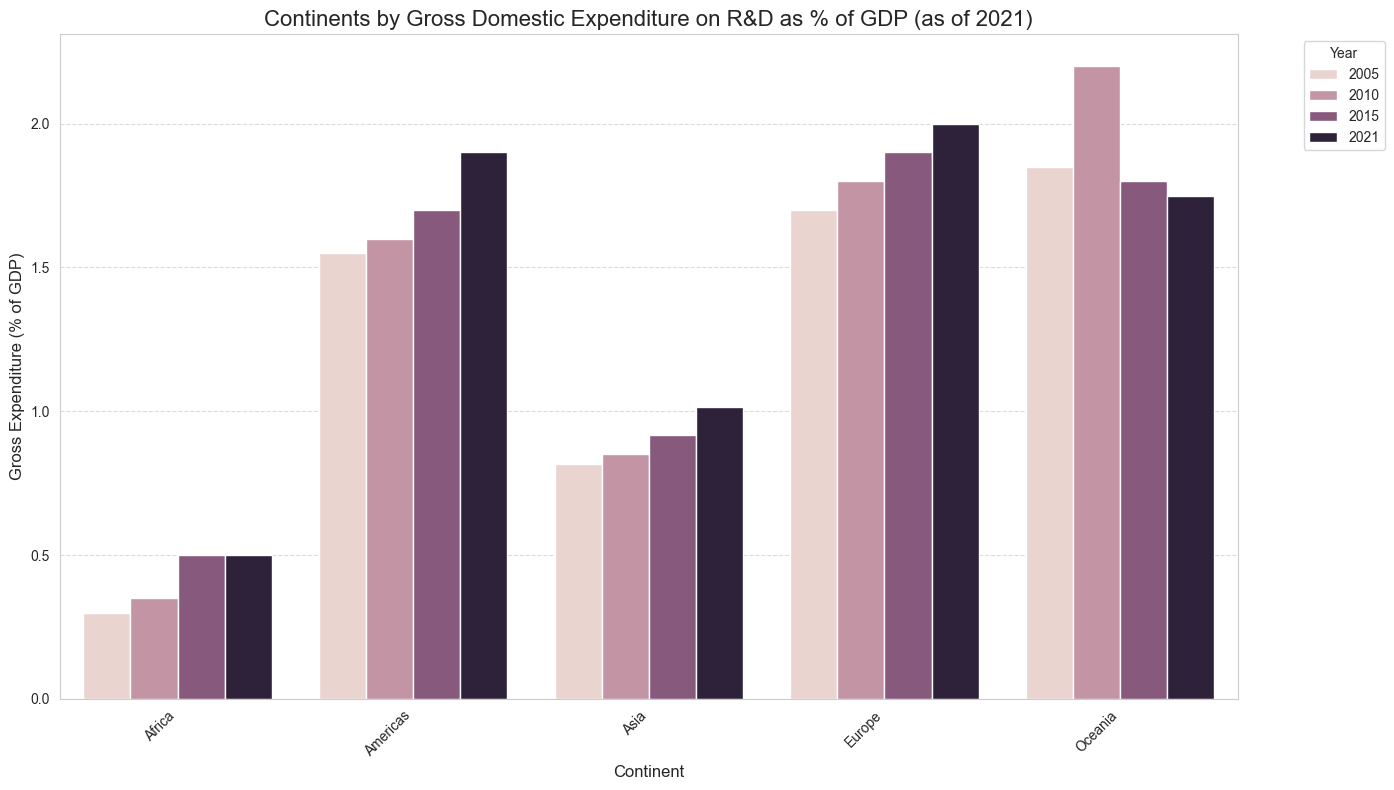

In [29]:
# Filter for R&D type
df_rd = df[(df['type'] == 'R&D')]

# Define the series of interest
gross_exp = 'Gross domestic expenditure on R&D: as a percentage of GDP'

# Regions to exclude
filtered_list = [
    'Americas', 'Northern America', 'Latin America & the Caribbean', 'Eastern Africa', 
    'Middle Africa', 'Southern Africa', 'Western Africa', 'Caribbean', 'Central America', 
    'South America', 'Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Central Asia', 
    'Eastern Asia', 'South-eastern Asia', 'Southern Asia', 'Western Asia', 'Europe',
    'European Union (EU)', 'Eastern Europe', 'Northern Europe', 'Southern Europe', 
    'Western Europe', 'LDC§', 'Total, all countries or areas', 'SIDS', 'South-central Asia', 'LLDCs',
    'Oceania','Australia and New Zealand'
]

# Filter data (exclude rows with missing values in relevant columns)
filtered_data = df_rd[
    (~df_rd['value'].isnull()) & 
    (~df_rd['continent'].isnull()) & 
    (~df_rd['year'].isnull()) & 
    (df_rd['series'] == gross_exp) &
    (df_rd['region/country/area'].isin(filtered_list)) &
    (df_rd['region/country/area'] != 'Total, all countries or areas') &
    (df_rd['year'] >= 2005) &
    (df_rd['continent'] != 'Other')
]

# Aggregate data at region level and year
continent_data = filtered_data.groupby(['year', 'continent'])['value'].mean().reset_index()

# Rename the 'value' column for clarity
continent_data.rename(columns={'value': 'Gross Domestic Expenditure on R&D: as % GDP'}, inplace=True)

# Get the **top 10 regions** based on the latest available year's R&D expenditure
latest_year = continent_data['year'].max()
top_10_regions = continent_data[continent_data['year'] == latest_year].nlargest(10, 'Gross Domestic Expenditure on R&D: as % GDP')

# Filter the dataset to only include the top 10 regions across all years
filtered_top_10 = continent_data[continent_data['continent'].isin(top_10_regions['continent'])]

# Pivot table with year and region as hierarchical index
pivot_table = filtered_top_10.pivot_table(index=['year', 'continent'], values='Gross Domestic Expenditure on R&D: as % GDP', aggfunc='mean')

# Convert pivot table to a flat format for plotting
pivot_table_flat = pivot_table.reset_index()

# Convert values back to numeric for plotting
pivot_table_flat['value_numeric'] = pivot_table_flat['Gross Domestic Expenditure on R&D: as % GDP']

# Plot the data grouped by region (X-axis) and year (with hue)
plt.figure(figsize=(14, 8))
sns.barplot(data=pivot_table_flat, x='continent', y='value_numeric', hue='year', dodge=True)

# Chart styling
plt.title(f'Continents by Gross Domestic Expenditure on R&D as % of GDP (as of {latest_year})', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Gross Expenditure (% of GDP)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
# Filter data (exclude rows with missing values in relevant columns)
filtered_data = df_rd[
    (~df_rd['value'].isnull()) & 
    (~df_rd['continent'].isnull()) & 
    (~df_rd['year'].isnull()) & 
    (df_rd['series'] == gross_exp) &
    (~df_rd['region/country/area'].isin(filtered_list)) &
    (df_rd['year'] >= 2010)
]

# Aggregate data at region/country level and year
country_data = filtered_data.groupby(['year', 'region/country/area'])['value'].sum().reset_index()

# Rename the 'value' column for clarity
country_data.rename(columns={'value': 'Gross Domestic Expenditure on R&D: as % GDP'}, inplace=True)

# Pivot table with year and region as hierarchical index
pivot_table = country_data.pivot_table(index=['year', 'region/country/area'], values='Gross Domestic Expenditure on R&D: as % GDP', aggfunc='sum')

# Sort by highest value first, then by year
pivot_table = pivot_table.sort_values(by=['Gross Domestic Expenditure on R&D: as % GDP', 'year'], ascending=[False, True])

display(pivot_table.head(10))

Gross Domestic Expenditure on R&D: as % GDP
year region/country/area                                                  
2021 Israel                                                            5.6
     Republic of Korea                                                 4.9
2015 Israel                                                            4.2
     Republic of Korea                                                 4.0
2010 Israel                                                            3.9
     Finland                                                           3.7
2020 United States of America                                          3.5
2021 United States of America                                          3.5
     Belgium                                                           3.4
     Sweden                                                            3.4

#### Researchers per million inhabitants (FTE) 

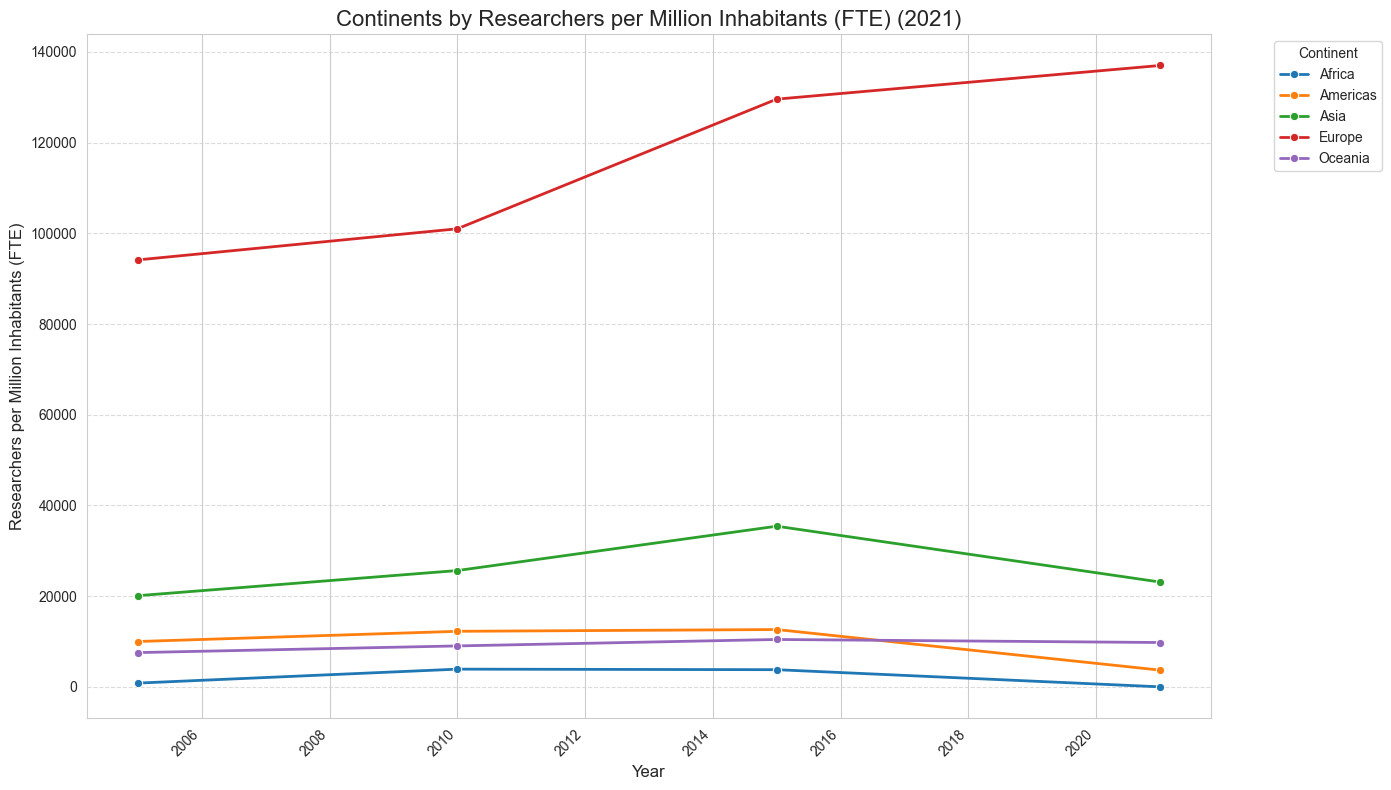

In [51]:
# Define the series of interest
researchers = 'Researchers per million inhabitants (FTE)'

# Regions to exclude
filtered_list = [
    'Americas', 'Northern America', 'Latin America & the Caribbean', 'Eastern Africa', 
    'Middle Africa', 'Southern Africa', 'Western Africa', 'Caribbean', 'Central America', 
    'South America', 'Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Central Asia', 
    'Eastern Asia', 'South-eastern Asia', 'Southern Asia', 'Western Asia', 'Europe',
    'European Union (EU)', 'Eastern Europe', 'Northern Europe', 'Southern Europe', 
    'Western Europe', 'LDC§', 'Total, all countries or areas', 'SIDS', 'South-central Asia', 'LLDCs',
    'Oceania'
]

year_list = [2005,2010,2015,2021]

# Filter data (exclude rows with missing values in relevant columns)
filtered_data = df_rd[
    (~df_rd['value'].isnull()) & 
    (~df_rd['continent'].isnull()) & 
    (~df_rd['year'].isnull()) & 
    (df_rd['series'] == researchers) &
    (~df_rd['region/country/area'].isin(filtered_list)) &
    (df_rd['year'].isin(year_list)) &
    (df_rd['region/country/area'] != 'Total, all countries or areas')&
    (df_rd['continent'] != 'Other')
]

# Aggregate data at continent
continent_data = filtered_data.groupby(['year', 'continent'])['value'].sum().reset_index()

# Rename the 'value' column for clarity
continent_data.rename(columns={'value': 'Researchers per million inhabitants (FTE)'}, inplace=True)

# Get the **top 10 regions**
latest_year = continent_data['year'].max()
top_10_continent = continent_data[continent_data['year'] == latest_year].nlargest(10, 'Researchers per million inhabitants (FTE)')

# Filter the dataset to only include the top 10 continents across all years
filtered_top_10 = continent_data[continent_data['continent'].isin(top_10_continent['continent'])]

# Pivot table with year and continents as hierarchical index
pivot_table = filtered_top_10.pivot_table(index=['year', 'continent'], values='Researchers per million inhabitants (FTE)', aggfunc='sum')

# Convert pivot table to a flat format for plotting
pivot_table_flat = pivot_table.reset_index()

# Convert values back to numeric for plotting
pivot_table_flat['value_numeric'] = pivot_table_flat['Researchers per million inhabitants (FTE)']

# Plot the data grouped by continents (X-axis) and year (with hue)
sns.set_style("whitegrid")

# Plot the data with a line plot
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=pivot_table_flat, 
    x='year', 
    y='value_numeric', 
    hue='continent', 
    marker='o', 
    linewidth=2
)

# Chart styling
plt.title(f'Continents by Researchers per Million Inhabitants (FTE) ({latest_year})', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Researchers per Million Inhabitants (FTE)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [41]:
# Filter data (exclude rows with missing values in relevant columns)
filtered_data = df_rd[
    (~df_rd['value'].isnull()) & 
    (~df_rd['continent'].isnull()) & 
    (~df_rd['year'].isnull()) & 
    (df_rd['series'] == researchers) &
    (~df_rd['region/country/area'].isin(filtered_list)) &
    (df_rd['year'] >= 2010)
]

# Aggregate data at region/country level and year
country_data = filtered_data.groupby(['year', 'region/country/area'])['value'].sum().reset_index()

# Rename the 'value' column for clarity
country_data.rename(columns={'value': 'Researchers per million inhabitants (FTE)'}, inplace=True)

# Pivot table with year and region as hierarchical index
pivot_table = country_data.pivot_table(index=['year', 'region/country/area'], values='Researchers per million inhabitants (FTE)', aggfunc='sum')

# Sort by highest value first, then by year
pivot_table = pivot_table.sort_values(by=['Researchers per million inhabitants (FTE)', 'year'], ascending=[False, True])

#Formatting
pivot_table = pivot_table.map(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)

display(pivot_table.head(10))

Researchers per million inhabitants (FTE)
year region/country/area                                          
2021 Republic of Korea                                    9,081.90
     Sweden                                               8,130.80
     Finland                                              7,870.70
2010 Finland                                              7,741.00
2021 Denmark                                              7,707.70
2015 Denmark                                              7,561.00
2021 Norway                                               7,227.90
2020 Singapore                                            7,224.70
2015 Republic of Korea                                    7,018.40
     Singapore                                            6,977.70

### HIGHEST UNEMPLOYEMENT RATE BY GENDER & CONTINENT

In [18]:
ue = ['Unemployment rate - Male', 'Unemployment rate - Female']
df_le = df[(df['type']== 'Labour & Unemployment') & (df['series'].isin(ue)) ]

series     Unemployment rate - Female  Unemployment rate - Male
continent                                                      
Africa                      11.511111                  8.365333
Americas                     9.806796                  7.853883
Asia                         7.837745                  5.380392
Europe                      10.008333                  9.503922
Oceania                      6.914545                  5.707273
Other                        6.319048                  5.019048


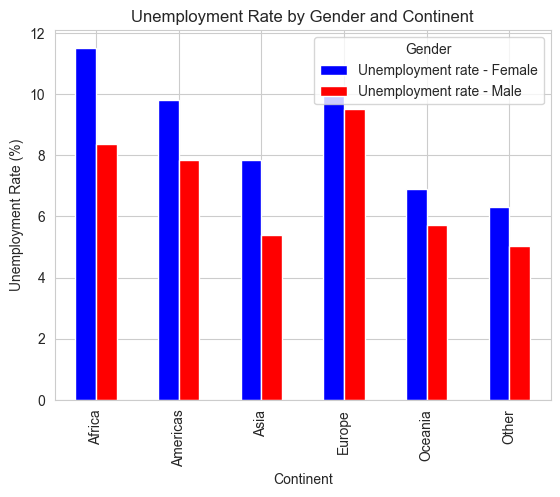

In [19]:
gender_unemployment = df_le.groupby(['continent', 'series'])['value'].mean().unstack()
print(gender_unemployment)

# unStacked bar chart using actual unemployment rates

gender_unemployment.plot(kind='bar', stacked=False, color=['blue', 'red'])

plt.title('Unemployment Rate by Gender and Continent')
plt.xlabel('Continent')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Gender')
plt.show()

### AFRICAN COUNTRIES WITH THE HIGHEST UNEMPLOYMENT RATE

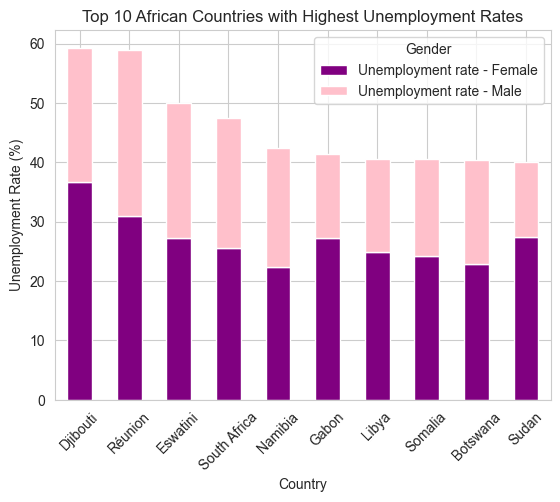

In [20]:
# Filter dataset to include only African countries
africa_df = df_le[df_le['continent'] == 'Africa']

# Group by country and unemployment series, then find the mean unemployment rate
africa_unemployment = africa_df.groupby(['region/country/area', 'series'])['value'].mean().unstack()

# Sort countries by highest total unemployment rate (if both male and female exist)
africa_unemployment['Total Unemployment'] = africa_unemployment.mean(axis=1)
top_countries = africa_unemployment.sort_values(by='Total Unemployment', ascending=False)
(top_countries.head(10))

# top 10 African countries with highest unemployment rates
top_countries.head(10).drop(columns=['Total Unemployment']).plot(kind='bar', stacked=True, color=['purple', 'pink'])

plt.title('Top 10 African Countries with Highest Unemployment Rates')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

In [21]:
lf = ['Labour force participation - Total'] #'Labour force participation - Female']
df_le = df[(df['type']== 'Labour & Unemployment') & (df['series'].isin(lf))]

### CONTINENT WITH THE HIGHEST LABOUR FORCE PARTICIPATION

series     Labour force participation - Total
continent                                    
Africa                              61.645333
Americas                            62.888350
Asia                                59.339706
Europe                              58.566829
Oceania                             63.030357
Other                               63.425000


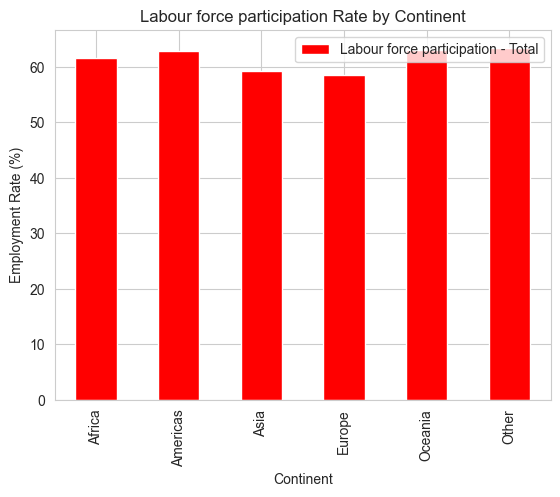

In [22]:
employed = df_le.groupby(['continent', 'series'])['value'].mean().unstack()
print(employed)

# unStacked bar chart using actual unemployment rates
employed.plot(kind='bar', stacked=False, color=['red'])

plt.title('Labour force participation Rate by Continent')
plt.xlabel('Continent')
plt.ylabel('Employment Rate (%)')
plt.legend(title='')
plt.show()

### OCEANIAN COUNTRIES WITH THE HIGHEST LABOUR FORCE PARTICIPATION RATE

series               Labour force participation - Total
region/country/area                                    
Solomon Islands                                  84.425
Faroe Islands                                    82.300
Cook Islands                                     71.900
Nauru                                            71.000
Vanuatu                                          69.475
New Zealand                                      69.025
Palau                                            67.500
Australia                                        65.250
Guam                                             61.825
Fiji                                             58.775


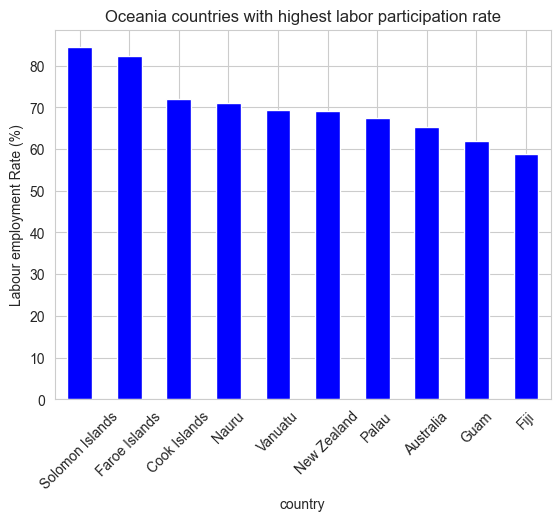

In [23]:
# Filter dataset to include only African countries
oceania_df = df_le[(df_le['continent'] == 'Oceania') & (df_le['region/country/area'] != 'Oceania')]

# Group by country and labour force participation series, then find the mean rate
oceania_labour = oceania_df.groupby(['region/country/area', 'series'])['value'].mean().unstack()

# Sort countries by highest labour force participation rate
top_countries_labour = oceania_labour.sort_values(by='Labour force participation - Total', ascending=False).head(10)
print(top_countries_labour)

top_countries_labour.head(10).plot(kind='bar', color='blue', legend=False)
plt.title('Oceania countries with highest labor participation rate')
plt.xlabel('country')
plt.ylabel('Labour employment Rate (%)')
#plt.legend(title=['labour force participation oceania'])
plt.xticks(rotation=45)
plt.show()

### Crime Section

#### Evolution of crime over years

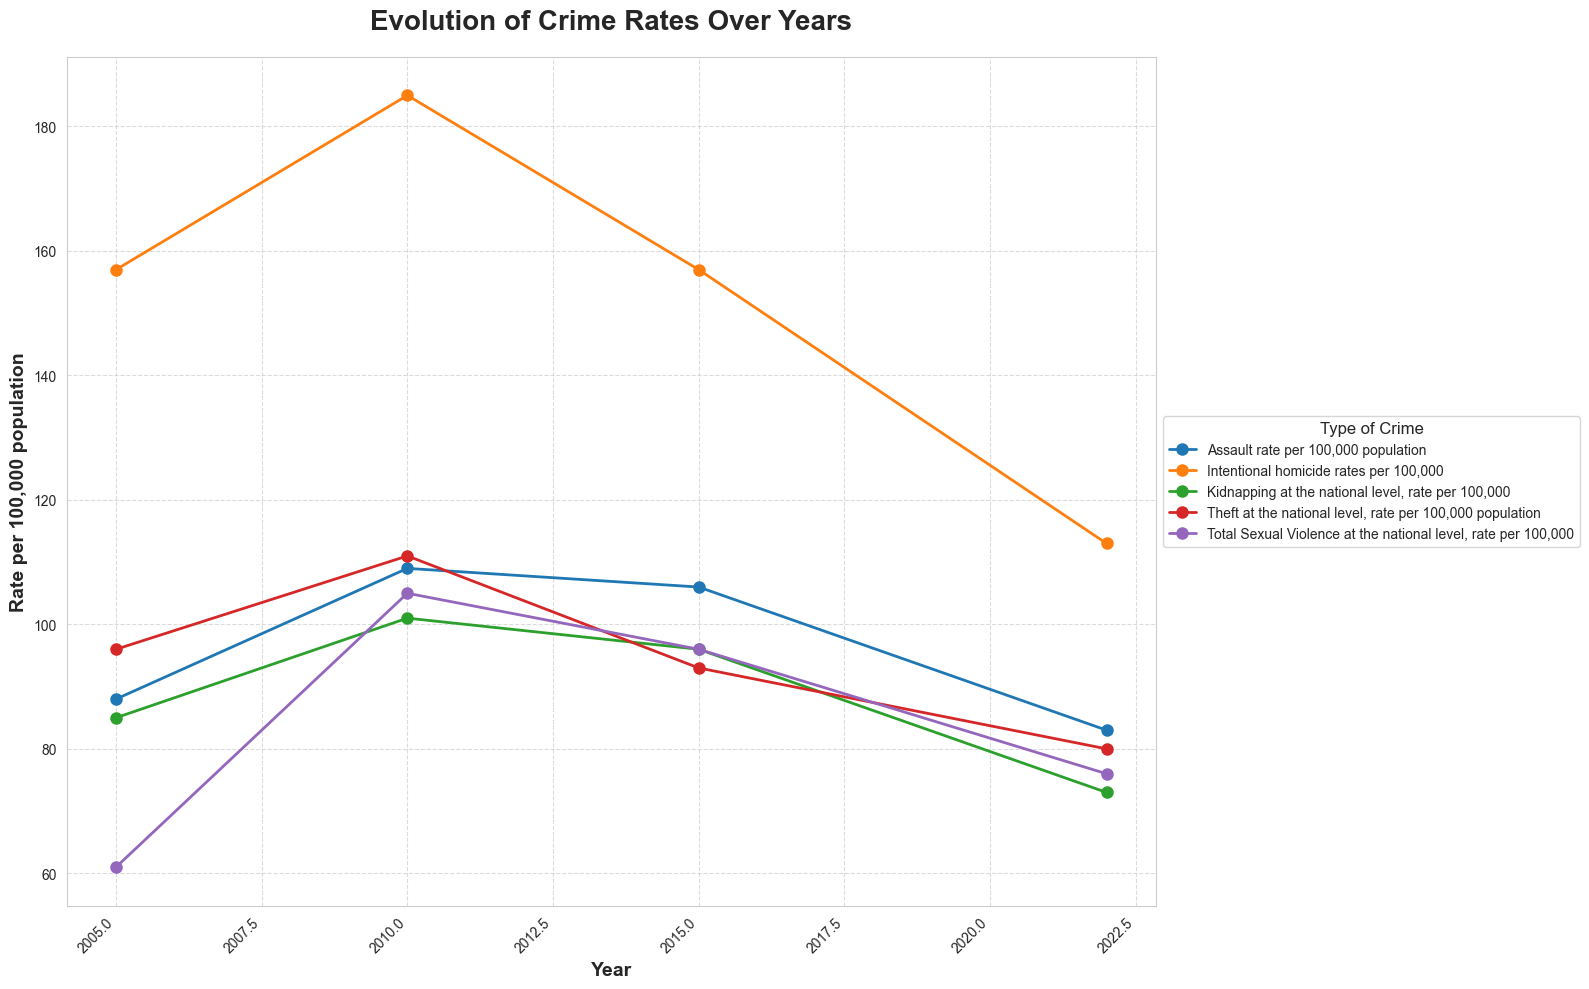

In [24]:
crime_types = ['Intentional homicide rates per 100,000',
               'Assault rate per 100,000 population', 
               'Theft at the national level, rate per 100,000 population',
               'Kidnapping at the national level, rate per 100,000',
               'Total Sexual Violence at the national level, rate per 100,000']

year_list = [2005,2010,2015,2022]

crime_df =df[(df['type']=='Crime') & (df['series'].isin(crime_types)) & (df['year'].isin(year_list))]


#regrouper les donnees par annee et serie
evolution=crime_df.groupby(['year','series']).size().unstack()

# Create a larger figure
plt.figure(figsize=(16, 10), dpi=100)

# Plot the data with enhanced styling
for column in evolution.columns:
    plt.plot(evolution.index, evolution[column], marker='o', linewidth=2, markersize=8, label=column)

# Set title and labels with improved typography
plt.title("Evolution of Crime Rates Over Years", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Rate per 100,000 population", fontsize=14, fontweight='bold')

# Enhance the legend
plt.legend(title='Type of Crime', title_fontsize=12, fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

# Improve grid appearance
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

#### type of crime per 100,000 inhabitants by country

type of crime per 100,000 inhabitants by country:


<Figure size 1500x800 with 0 Axes>

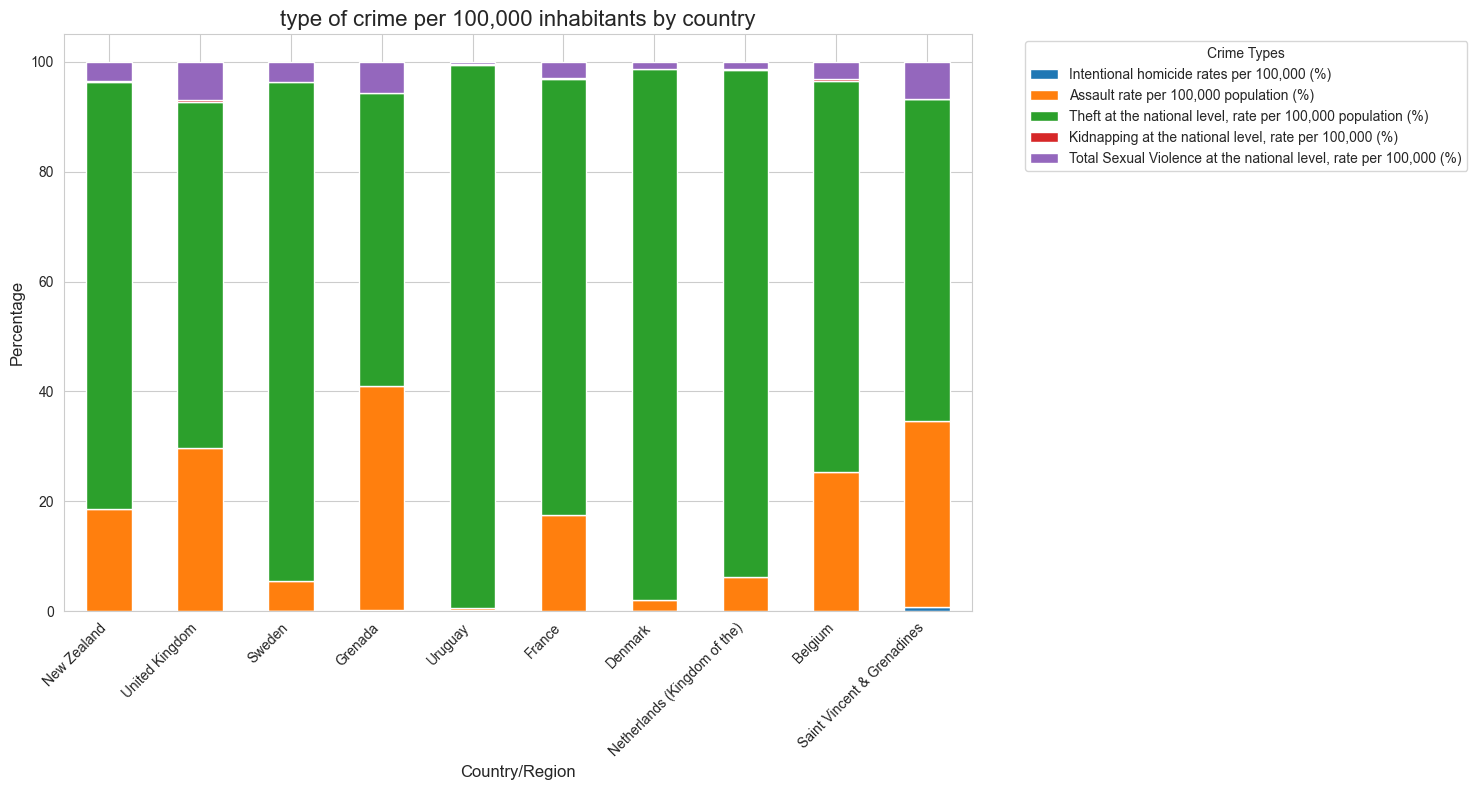

In [25]:
# Assuming 'df' is your original DataFrame
crime_types = ['Intentional homicide rates per 100,000',
               'Assault rate per 100,000 population', 
               'Theft at the national level, rate per 100,000 population',
               'Kidnapping at the national level, rate per 100,000',
               'Total Sexual Violence at the national level, rate per 100,000']

crime_type = df[df["series"].isin(crime_types)]


# Pivot the data
pivot_df = crime_type.pivot_table(
    index='region/country/area', 
    columns='series', 
    values='value', 
    aggfunc='sum'
)

# Rename columns
pivot_df.columns = [col.split(':')[0].strip() for col in pivot_df.columns]

# Fill missing values with 0
pivot_df = pivot_df.fillna(0)

# Calculate total victims
pivot_df['Total Victims'] = pivot_df.sum(axis=1)

# Calculate percentages
for col in crime_types:
    col_name = col.split(':')[0].strip()
    pivot_df[f'{col_name} (%)'] = (pivot_df[col_name] / pivot_df['Total Victims']) * 100

# Sort by total number of victims and select the top 10 regions
top_10_regions = pivot_df.sort_values('Total Victims', ascending=False).head(10)

print("type of crime per 100,000 inhabitants by country:")


# Plotting
plt.figure(figsize=(15, 8))
top_10_regions[[col for col in pivot_df.columns if '(%)' in col]].plot(
    kind='bar', stacked=True, figsize=(15, 8)
)
plt.title("type of crime per 100,000 inhabitants by country", fontsize=16)
plt.xlabel("Country/Region", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Crime Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Display Crime separately

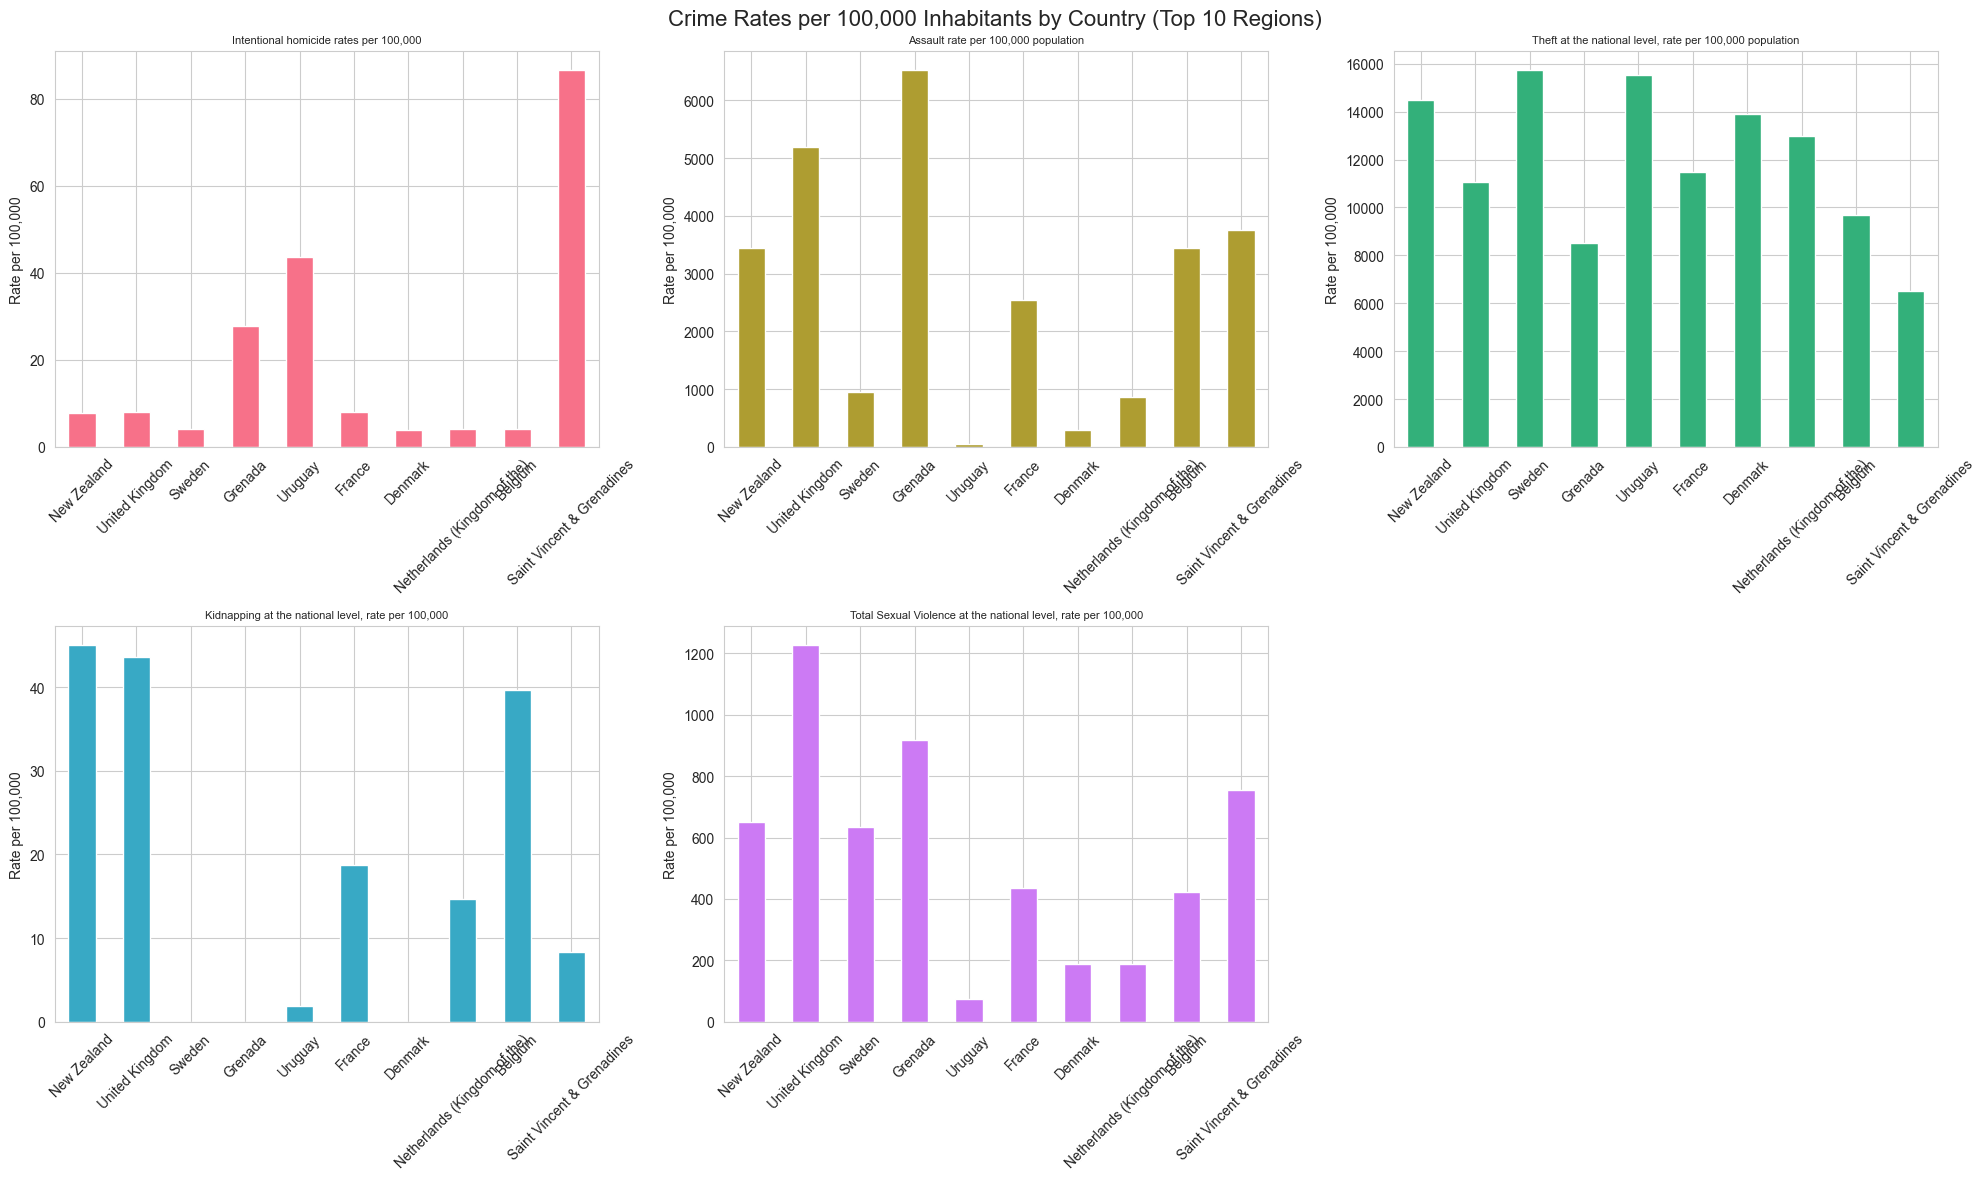

In [26]:
# Assuming 'df' is your original DataFrame
crime_types = ['Intentional homicide rates per 100,000',
               'Assault rate per 100,000 population', 
               'Theft at the national level, rate per 100,000 population',
               'Kidnapping at the national level, rate per 100,000',
               'Total Sexual Violence at the national level, rate per 100,000']

# Pivot the data
pivot_df = df.pivot_table(
    index='region/country/area', 
    columns='series', 
    values='value', 
    aggfunc='sum'
)

# Rename columns
pivot_df.columns = [col.split(':')[0].strip() for col in pivot_df.columns]

# Fill missing values with 0
pivot_df = pivot_df.fillna(0)

# Calculate total victims
pivot_df['Total Victims'] = pivot_df[crime_types].sum(axis=1)

# Sort by total number of victims and select the top 10 regions
top_10_regions = pivot_df.sort_values('Total Victims', ascending=False).head(10)

# Create a color palette
colors = sns.color_palette("husl", len(crime_types))

# Create subplots for each crime type
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
fig.suptitle("Crime Rates per 100,000 Inhabitants by Country (Top 10 Regions)", fontsize=16)

for i, crime in enumerate(crime_types):
    row = i // 3
    col = i % 3
    top_10_regions[crime].plot(kind='bar', ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(crime, fontsize=8)
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Rate per 100,000")
    axes[row, col].tick_params(axis='x', rotation=45)

# Remove the empty subplot
if len(crime_types) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

####  Percentage of homicides by sex (male/female) / display by country

Top 10 regions with the highest percentage of homicide victims:
                              Percentage of Victims  Female Percentage  \
region/country/area                                                      
Jamaica                                  101.860000          10.465345   
Honduras                                  93.050000           9.349812   
Venezuela (Boliv. Rep. of)                90.525000           5.412869   
United States Virgin Islands              88.883333           8.138009   
South Africa                              68.050000          13.960323   
Saint Kitts and Nevis                     65.991667           6.250789   
Belize                                    65.066667          10.860656   
Colombia                                  62.700000           8.006380   
Trinidad and Tobago                       61.080000           9.855927   
Guatemala                                 60.920000          11.950098   

                              Male Percentage  

<Figure size 1200x600 with 0 Axes>

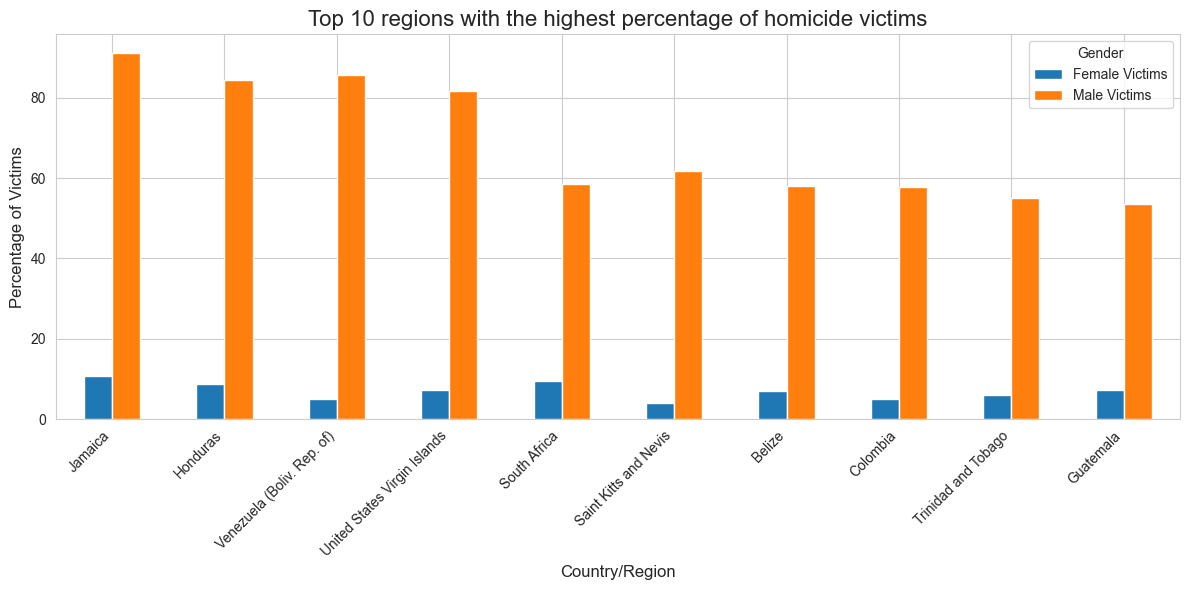

In [27]:
# Filter data
filtered_df = df[(df['series'].isin([
    'Percentage of male and female intentional homicide victims, Male',
    'Percentage of male and female intentional homicide victims, Female'])) & (df['value'] < 100)]

#  Reorganize data to have separate columns for men and women
pivot_df = filtered_df.pivot_table(
    index='region/country/area', 
    columns='series', 
    values='value', 
    aggfunc='mean'
)

# Rename columns
pivot_df.columns = ['Female Victims', 'Male Victims']

# Fill in missing values with 0
pivot_df = pivot_df.fillna(0)

# Calculate total victims and percentages
pivot_df['Percentage of Victims'] = pivot_df['Female Victims'] + pivot_df['Male Victims']
pivot_df['Female Percentage'] = (pivot_df['Female Victims'] / pivot_df['Percentage of Victims']) * 100
pivot_df['Male Percentage'] = (pivot_df['Male Victims'] / pivot_df['Percentage of Victims']) * 100


# Sort by total number of victims and select the top 10 regions
top_10_regions = pivot_df.sort_values('Percentage of Victims', ascending=False).head(10)
print("Top 10 regions with the highest percentage of homicide victims:")
print(top_10_regions[['Percentage of Victims', 'Female Percentage', 'Male Percentage']])

# Create a multiple bar plot using plot.bar()
plt.figure(figsize=(12, 6))
top_10_regions[['Female Victims', 'Male Victims']].plot.bar(figsize=(12, 6))

plt.title("Top 10 regions with the highest percentage of homicide victims", fontsize=16)
plt.xlabel("Country/Region", fontsize=12)
plt.ylabel("Percentage of Victims", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender", loc="upper right")
plt.tight_layout()
plt.show()

In [28]:
#Create final dataset csv file

df.to_csv('../data/clean/final_dataset.csv')